## Задание выполненное в ходе изучения KNN

## Про оценивание

В рамках данной работы вы можете набрать даже не 10, а целых 13. однако итоговая оценка за данную работу не может составлять более 10 баллов. Дополнительные задания являются своего рода "страховкой", если с какими-то заданиями не получится хорошо справиться.

Для удобства проверки заполните ячейку ниже:

**ФИО:** Архипова Анастасия Станиславовна 


**Баллов:**  13, ведь я решила всё ＼(￣▽￣)／

(но не знаю, правильно ли)

P.s. я закончила это задание до того, как посмотрела курс Supervised Learning, в котором рассказывается о KNN :(

# Метод k-ближайших соседей (kNN)

Давайте перейдем к более прикладным задачам и сначала познакомимся с методом k-ближайщих соседей. Потом его реализуем в виде класса.

`kNN` расшифровывается как `k Nearest Neighbor` или `k Ближайших Соседей` — это один из самых простых алгоритмов классификации, также иногда используемый в задачах регрессии. Задача классификации в машинном обучении — это задача отнесения объекта к одному из заранее определенных классов на основании его формализованных признаков. Каждый из объектов в этой задаче представляется в виде вектора в N-мерном пространстве, каждое измерение в котором представляет собой описание одного из признаков объекта. Допустим нам нужно классифицировать мониторы: измерениями в нашем пространстве параметров будут величина диагонали в дюймах, соотношение сторон, максимальное разрешение, наличие HDMI-интерфейса, стоимость и др. 


## Теория

Идея за алгоритмом kNN довольно простая. Он просто считает расстояние от новой точки, до всех известных обучающих точек. Расстояние может быть найдено разными способами. Далее выбирает к-ближайщих точек, где к - целое число. И в конце, на основе классов, к которому принадлежит большинство отобранных точек, присваивает класс новой точке.

Давайте посмотрим на работу алгоритма на основе простого примера. Допустим у нас есть датасет по двум переменным, который изображен на рисунке ниже.

![image.png](1.png)

Нашей задачей будет классифицировать новую точку 'X' в один из классов: `Фиолетовый` или `Красный`. Координаты нашей точки будет равны: x = 45 и y = 50. Пусть количество соседей (K) равно `3`. Алгоритм КНН посчитает расстояния от точки Х до всех остальных точек. Затем он находит, ближайщие по расстоянию до точки Х, точки. Они показаны на рисунке ниже. Три ближайшие точки находятся внутри круга.

![image.png](2.png)

Последний шагом алгоритма будет присвоить новой точке класс большинства ближайшех точек вокруг. На изображении выше, видно что два из трех ближайщех точек принадлежат классу `Красные` и одна тчока принадлежит классу `Фиолетовые`. Поэтому новая точка будет классифицирована как `Красный`.

## Датасет

В качестве датасет мы будем использовать знаменитый датасет `iris`. Датасет состоит из четырех аттрибутов: `sepal-width`, `sepal-length`, `petal-width` и `petal-length`. Это аттрибуты конкретных типов расстения ирис. Задачей является предсказать к какому типу ириса относится конкретное расстение. Есть три класса в нашем датасете: `Iris-setosa`, `Iris-versicolor` и `Iris-virginica`.

Каждое расстение имеет уникальные признаки: `sepal length` (длина чашелистика), `sepal width` (ширина чашелистика), `petal length` (длина лепестка) и `petal width` (ширина лепестка). 

Давайте посмотрим на данные в pandas, но работать для реализации классов будем со списками.

In [503]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Назовем колонки датасета
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# создадим датасет
dataset = pd.read_csv(url, names=names)
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Задание 1 - 0.5 балла**

Подготовьте данные для работы: в переменную X определите список из пар числе отвечающих за sepal-length и sepal-width соответственно. В переменную y - за правильные классы для тех же строк.

In [504]:
X = []
y = []
for i in range(len(dataset)):
    X.append([dataset.iloc[i]['sepal-length'], dataset.iloc[i]['sepal-width']])
    y.append(dataset.iloc[i]['Class'])

In [505]:
# если вы сделали все правильно - эта ячейка не должна выдать ошибок:
assert len(X) == 150
assert len(y) == 150
assert len(X[0]) == 2

**Задание 2 - 0.5 балла**

Визуализируйте данные - отобразите на графике зависимость длины от ширины

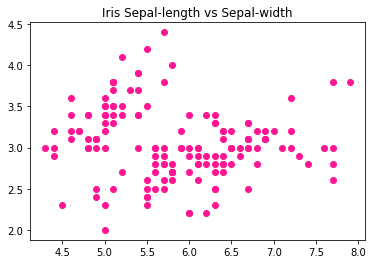

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.scatter(dataset['sepal-length'], dataset['sepal-width'], c='deeppink')
plt.title("Iris Sepal-length vs Sepal-width")
plt.show()

**Задание 3 - 0.5 балла**

Используя функцию train_test_split из библиотеки **sklearn** разбейте выборку на train и test в соотношении 4/1 соответственно. Зафиксируйте __random_state__ в значении 42

In [506]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [507]:
# проверка
assert len(X_train) == 120 and len(X_test) == 30

## Простая реализация kNN
Теперь, имея обучающую выборку, можно реализовать и сам алгоритм классификации. В качестве способа нахождения расстояния от искомой точки до ближайщих соседей, будем использовать `евклидово расстояние`. Для определения расстояния между объектами можно использовать не только евклидово расстояние: также применяются манхэттенское расстояние, косинусная мера, критерий корелляции Пирсона и др.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/220px-Euclidean_distance_2d.svg.png)

**Задание 4 - 0.5 балла**

Реализуйте функцию `dist` ниже, вычисляющую евклидово расстояние между двумя парами точек на плоскости. `a` и `b` - списки из двух элементов

In [148]:
def dist(a, b):
    xa, ya = a[0], a[1]
    xb, yb = b[0], b[1]
    distance = ((xa - xb)**2 + (ya - yb)**2) ** 0.5
    return distance

**Задание 5 - 0.5 балла**

Дополните функцию определяющую класс точки созданием словаря, где ключем является класс а значеним - количество соседей с этим классов из k-соседей.

In [333]:
def predict(X_train, y_train, x_test, k):
    # создадим список, где будем хранить расстояния и типы ближайших соседей
    distances = []
    targets = {}

    for i in range(len(X_train)):
        # пройдем по всем точкам и посчитаем расстояние до них от тестовой точки
        distances.append([dist(x_test,X_train[i]), i])

    # отсортируем расстояния - так первыми будут идти соседи с минимальными расстояниями
    distances = sorted(distances)
     
    # создадим словарь с k ближайщими значениями targets
    for j in range(k):
        position = distances[j][1]
        if y_train[position] not in targets.keys():
            targets[y_train[position]] = 0
        targets[y_train[position]] += 1
       
    # вернем самую часто встречающаюся метку
    return max(targets,key=targets.get)

In [339]:
a = [2, 4,33, 43, 80, 6, 7, 5]
print(sorted(a))

[2, 4, 5, 6, 7, 33, 43, 80]


**Задание 6 - 0.5 балла**

Сделайте предсказание с использованием функции выше для всех точек из тестового множества и параметром `k` равным 7

In [246]:
# Создадим список с будущими предсказаниями
predictions = []
# количество соседей
k = 7
# идем по все тестовым данным
for flower in X_test:
    prediction = predict(X_train, y_train, flower, k)
    predictions.append(prediction)

In [247]:
assert len([item for item in predictions if item=='Iris-setosa' ]) == 10

Визуализируем изначальные метки. Переведем текстовые значения меток в численные, чтобы можно было построить график, где точки разного цвета (аргумент, которые отвечает за цвет в matplotlib, принимает категории, записанные числами).

**Задание 7 - 0.5 балла**

Визаулизируейте с использованием графика `scatter` и цветных точек распределение объектов в осях длины-ширины по классам отдельно для точек из тренировочной и тестовой выборок (должно получиться два графика, похожих на график в примере).

In [188]:
# Может, я что-то упускаю, но так строить график удобнее

def get_coord(lst):
    lenght = []
    width = [] 
    for el in lst:
        lenght.append(el[0])
        width.append(el[1])    
    return lenght, width

def get_color(lst):
    book = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
    color_code = []
    for flower in lst:
        color_code.append(book[flower])
    return color_code

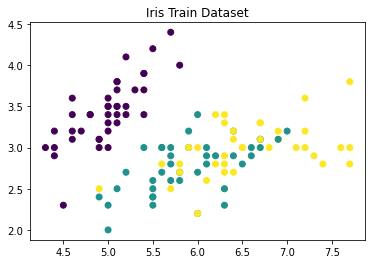

In [201]:
# Визуализируем тренировочный датасет
train_lenght, train_width = get_coord(X_train)
train_color = get_color(y_train)

plt.figure()
plt.scatter(train_lenght, train_width, c = train_color)
plt.title("Iris Train Dataset")
plt.show()

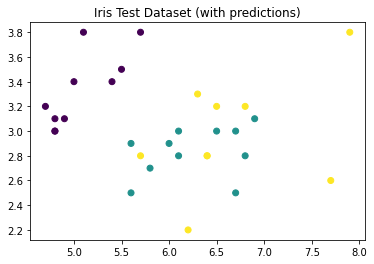

In [204]:
# Визуализируем тестовый датасет c предсказанием
train_lenght, train_width = get_coord(X_test)
train_color = get_color(predictions)

plt.figure()
plt.scatter(train_lenght, train_width, c = train_color)
plt.title("Iris Test Dataset (with predictions)")
plt.show()

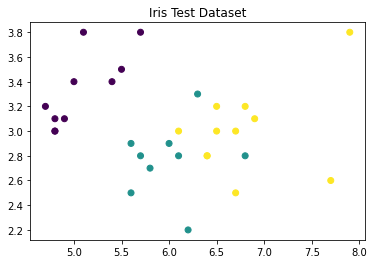

In [205]:
# ... и в реальности
train_lenght, train_width = get_coord(X_test)
train_color = get_color(y_test)

plt.figure()
plt.scatter(train_lenght, train_width, c = train_color)
plt.title("Iris Test Dataset")
plt.show()

In [ ]:
# Вышло как-то не очень точно и сразу захотелось измерить accuracy

**Задание 8 - 0.5 балла**

Используя библиотеку __sklearn__ рассчитайте значение метрики доли правильных ответов (accuracy) для получившихся предсказаний на тестовой выборке

In [209]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(predictions, y_test)

print(round(accuracy, 5), '%', sep='')

0.73333%


**Задание 9 - 1 балл**

Попробуйте предсказывать классы с использованием различного параметра `k` в интервале от 1 до 15. При каком значении достигается оптимальное качество? Как это можно объяснить?

In [561]:
all_k = []

for k in range(1,16):
    preds = []
    for flower in X_test:
        prediction = predict(X_train, y_train, flower, k)
        preds.append(prediction) 
    accuracy = accuracy_score(preds, y_test)
    all_k.append([round(accuracy, 3), k])


all_k = sorted(all_k, reverse = True)
for el in all_k:
    print(el)

best_ac, best_k = all_k[0]
best_ac, best_k2 = all_k[1]

print('________________________________________________________________')
print('При к = %d и к = %d достигается наибольшее значение accuracy %s' % (best_k, best_k2, round(best_ac, 4)))

[0.867, 6]
[0.867, 4]
[0.833, 15]
[0.833, 10]
[0.8, 12]
[0.8, 9]
[0.8, 8]
[0.8, 5]
[0.8, 3]
[0.8, 2]
[0.8, 1]
[0.767, 14]
[0.767, 13]
[0.767, 11]
[0.733, 7]
________________________________________________________________
При к = 6 и к = 4 достигается наибольшее значение accuracy 0.867


*Место для вашего вывода:*

Больше - не езначит лучше. Поскольку у нас очень мало наблюдений - всего 120, использование слишком большого количества соседей приведет к снижению точности из-за размытия границ между классами и "прямой" границы, а при малом числе соседей KNN будет обладать низкой обобщающей способностью, что может привести к переобучению. Подбор параметра обычно осуществляется при помощи кросс-валидации. (источник: http://www.machinelearning.ru/wiki/index.php?title=Метод_ближайшего_соседа)

(В конце в задании 17 добавлен график зависимости качества от количества к)

## **Задание 10 - 2 балла**

**0.5 балла**  
Давайте немного изменим задание. Давайте представим, что нас теперь интересует только класс ирисов setosa. Создайте переменные y_train_setosa и y_test_setosa, где ирисы setosa будут закодированы единицами, а остальные нулями.


**1 балл (каждая функция - 0.5 балла)**  
В качестве метрики качества самостоятельно реализуйте функции, считающие метрики Precision и Recall. 
![](https://miro.medium.com/max/1068/1*EXa-_699fntpUoRjZeqAFQ.jpeg)

**0.5 балла**  
Снова предскажите виды ирисов на тестовой выборке, но теперь  с y_train_setosa и y_test_setosa при разных параметрах `k` в интервале от 1 до 15. Постройте график изменения данных метрик (линейный тренд).

In [239]:
set(y_test)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [241]:
def get_setosa(lst):
    new_lst = []
    for el in lst:
        if el == 'Iris-setosa':
            new_lst.append(1)
        else:
            new_lst.append(0)
    return new_lst

In [244]:
y_train_setosa = get_setosa(y_train)
y_test_setosa = get_setosa(y_test)

In [252]:
def metrics(preds, real):
    
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    for i in range(len(preds)):
        if preds[i] == 0:
            if real[i] == 0:
                TN += 1
            else:
                FN += 1
        elif preds[i] == 1:
            if real[i] == 1:
                TP += 1
            else:
                FP += 1
                
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1 = 2 * ((precision*recall)/(precision+recall))
            
    return precision, recall, F1

In [282]:
# Проверяем как работают метрики
x = [1, 0, 0, 0, 0, 1]
y = [1, 0, 0, 0, 0, 0]
print(metrics(x, y))

(0.5, 1.0, 0.6666666666666666)


In [285]:
# Создадим список с будущими предсказаниями
setosa_predictions = []
# количество соседей
k = 7
# идем по все тестовым данным
for flower in X_test:
    prediction = predict(X_train, y_train_setosa, flower, k)
    setosa_predictions.append(prediction)

In [286]:
# Я просто хочу знать что всё в порядке...
print(setosa_predictions)
print(y_test_setosa)

[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1]


In [270]:
precision, recall, F1 = metrics(setosa_predictions, y_test_setosa)
print(precision, recall, F1)

1.0 1.0 1.0


In [271]:
# Получилась идеальная точность. Что ж, испортим вручную предсказание, чтобы проверить, работают ли функции
setosa_predictions_wrong = [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [562]:
# На неправильных предсказаниях программа оценки метрик работает (думаю, это хорошо)
precision2, recall2, F12 = metrics(setosa_predictions_wrong, y_test_setosa)
print(precision2, recall2, F12)

0.8181818181818182 0.9 0.8571428571428572


##### Перейдем к последней части задания - визуализации: 

(Включает в себя задание 11)

In [305]:
import matplotlib.pyplot as plt  

# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline  

In [306]:
all_k = []

for k in range(1,16):
    preds = []
    for flower in X_test:
        prediction = predict(X_train, y_train_setosa, flower, k)
        preds.append(prediction) 
    precision, recall, F1 = metrics(preds, y_test_setosa)
    all_k.append([k, precision, recall, F1])

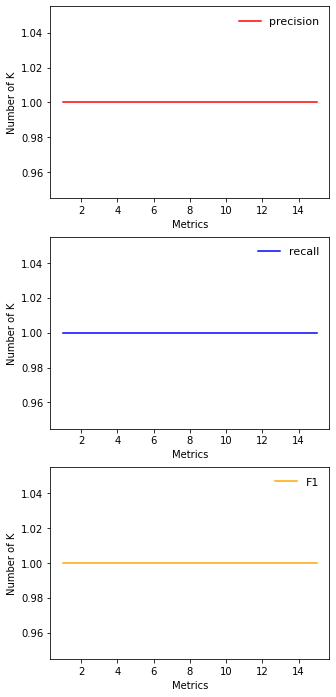

In [321]:
prec = []
rec = []
F1 = []
kk = []

for el in all_k:
    kk.append(el[0])
    prec.append(el[1])
    rec.append(el[2])
    F1.append(el[3])
    

fig, ax = plt.subplots(3, 1, figsize=(5,12))
ax[0].plot(kk, prec, label = 'precision', color='red')
ax[1].plot(kk, rec, label = 'recall', color='blue')
ax[2].plot(kk, F1, label = 'F1', color='orange')

for i in range(3):
        ax[i].set_xlabel('Metrics', fontsize = 10)
        ax[i].set_ylabel('Number of K', fontsize = 10)
        ax[i].legend(loc=1, fontsize=11, frameon=False)


## **Задание 11 - 1 балл**

Реализуйте самостоятельно функцию, вычисляющую метрику f_score (см. выше). Снова предскажите виды ирисов на тестовой выборке, но тепероь с y_train_setosa и y_test_setosa при разных параметрах k в интервале от 1 до 15. При каком значении параметра `k` достигается лучшее значение данной метрики?

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [ ]:
# Я решаю задания последовательно, поэтому вывела все это для F1 в предыдущем пункте. 
# Чтобы не делать блкнот слишком длинным я не буду дублировать код.

**Задание 12 - 1.5 балла**

Реализуйте новую функцию расстояния вместо эквлидового на выбор:
- $dist(x1,y1, x2,y2) = |x1-x2| + |y1-y2|$
- $dist(x1,y1, x2,y2) = max(|x1-x2|, |y1-y2|)$

Постройте график зависимости качества модели в терминах доли правильных ответов (accuracy) и f-меры (f-score) в зависимости от параметра `k` модели в интервале от 1 до 15. 

In [324]:
import math

def dist1(x1,y1,x2,y2):
    return math.fabs(x1 - x2) + math.fabs(y1 - y2)
    
def dist2(x1,y1,x2,y2):
    a = math.fabs(x1 - x2)
    b = math.fabs(y1 - y2)
    return max(a, b)

# Мне больше нравится первое

In [331]:
print(X_train[0][1])

3.6


In [334]:
def predict_new(X_train, y_train, x_test, k):
    # создадим список, где будем хранить расстояния и типы ближайших соседей
    distances = []
    targets = {}

    for i in range(len(X_train)):
        train1 = X_train[i][0]
        train2 = X_train[i][1]
        test1 = x_test[0]
        test2 = x_test[1]
        distances.append([dist1(train1, train2, test1, test2), i])

    # отсортируем расстояния
    distances = sorted(distances)
    
    
    # создадим словарь с k ближайщими значениями targets
    for j in range(k):
        position = distances[j][1]
        if y_train[position] not in targets.keys():
            targets[y_train[position]] = 0
        targets[y_train[position]] += 1
       
    # вернем самую часто встречающаюся метку
    return max(targets,key=targets.get)

In [338]:
all_k = []

for k in range(1,16):
    preds = []
    for flower in X_test:
        prediction = predict_new(X_train, y_train_setosa, flower, k)
        preds.append(prediction) 
    precision, recall, F1 = metrics(preds, y_test_setosa)
    accuracy = accuracy_score(preds, y_test_setosa)
    all_k.append([k, accuracy, F1])
    
print(all_k)

[[1, 1.0, 1.0], [2, 1.0, 1.0], [3, 1.0, 1.0], [4, 1.0, 1.0], [5, 1.0, 1.0], [6, 1.0, 1.0], [7, 1.0, 1.0], [8, 1.0, 1.0], [9, 1.0, 1.0], [10, 1.0, 1.0], [11, 1.0, 1.0], [12, 1.0, 1.0], [13, 1.0, 1.0], [14, 1.0, 1.0], [15, 1.0, 1.0]]


Нам по-прежнему все равно, какое количество соседей использовать.

### **Задание 13 - 0.5 балл**

Основывась на все эксперименты и метрики выше, еще раз запустите лучшую модель при лучших параметрах (мера расстояния, функция измерения ошибки, количество соседей). Опционально: попробуйте обяснить, почему выбранные параметры обеспечивают наиболее качественное решение

In [322]:
# запускаем любую модель

setosa_predictions = []
k = 6

for flower in X_test:
    prediction = predict(X_train, y_train_setosa, flower, k)
    setosa_predictions.append(prediction)

print(metrics(preds, y_test_setosa))  # precision, recall, F1

(1.0, 1.0, 1.0)


### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

*Мы видим, что при любом количестве соседей от 1 до 15 KNN достигает абсолютной точности в задачи бинарной классификации принадлежности к виду Iris-setosa. Это вызвано тем, что все цветы данного вида локализованы в левом верхнем углу в координатах длина-ширина лепестков, то есть имеют в среднем большую ширину при меньшей длине, чем цветы, принадлежащие к другой выборке. То, что все Setosa локализованы отдельно, позволяет правильно определить, принадлежит ли тестируемый цветок к данному виду или нет, основываясь на любом количестве соседей из диапазона: setosa окружен setosa, и самое частотное предсказание для его соседей это 1, а не-setosa окружен другими не-setosa. Для данной задачи можно запустить любую модель, и я выберу 6, т.к. это оптимальное К для предыдущей задачи.*

# Бонусная часть

В рамках данной части вам предлагается реализовать похожие вещи в виде класса и воспроизвести схожые эксперименты. Баллы набранные за эту часть задания "останутся" в рамках данной домашней работы, однако могут компенсировать какие либо огрехи и пропущенные задания выше. Итоговая оценка за данную работу даже при полностью решенных задачах не может составлять более 10 баллов.

Чтобы сделать это задание, нужно самостоятельно разобраться с классами. Например, по этому блокноту:
https://github.com/rogovich/2020_MIREC_PfDA/blob/master/%40HW/2_HW/Bonus_Classes.ipynb

## Реализация kNN в виде класса

У нас уже есть все нужные нам кирпичики, поэтому реализуем kNN в виде класса. Он у нас будет состоять из конструктора, где мы инициализруем переменные, метода `dist`, который возвращает евклидово расстояние, метода `fit`, который будет задавать переменные обучающей выборки, и метода `predict`, который будет считать дистанции возвращать нам предсказанные значения. Также создадим метод `score`, считающуй accuracy,  и метод `plot`, который будет рисовать графики.

**Задание 14 - 0 баллов - оно сделано**


Конструктор у нас будет просто инициализировать переменные. Как правило в ML мы создаем экземпляр класса не на данных, а с определенными параметрами (например, задаем количество соседей). А данные будем уже передавать методу .fit() (обучение). Чтобы обучать нам сначала нужно определить метод, считающий расстояние. Т.к. этот метод не принимает данные напрямую, а будет только вызываться в predict(), то объявим его статическим. Также "скроем" его нижним подчеркиванием (намекнем, что мы не предполагаем, что этот метод должен вызываться от объекта класса).

**Задание 15 - 0.5 балла**


Теперь давайте определим метод .fit(). Это уже будет динамический метод, который вызывается от экземпляра класса. fit() дожен принимать тренировочную выборку (признаки и ответы) и сохранять ее в атрибуты класса self.X_train и self.y_train 

**Задание 16 - 0.5 балл**

Теперь реализуем predict() - здесь уже будет происходить много всего. Метод будет принимать тестовые точки и находить расстояние от них всех до тренировочных точек. Потом будет брать k соседей и предсказывать по ним класс объекта. Метод должен возвращать вектор предсказанных значений для тестовой выборки.

*Подсказка* - многие части могут приехать из ранее написанной функции `predict`.

**Задание 17 - 1 балл**

А теперь давайте еще добавим два метода - подсчет правильности предсказания и рисование графика. plot() будет строить нам два графика - предсказанные значения и правильные "ответы". Метод будет динамическим, но будет принимать один внешний аргумент - y_test. Метод score() давайте для тренировки сделаем статистическим (он будет принимать два внешних списка - предсказанные значения и правильные ответы).

In [523]:
class KNN:
    """
    k-NN классификатор

    Возвращает: предсказания k-NN
    """

    def __init__(self, k):
        self.X_train = None
        self.y_train = None
        self.k = k
        self.predictions = []
    
    @staticmethod
    def _dist(a, b):
        """
        Расстояние евклида
        Принимает на вход два вектора

        Возвращает: число с плавающей точкой
        """
        xa, ya = a[0], a[1]
        xb, yb = b[0], b[1]
        distance = ((xa - xb)**2 + (ya - yb)**2) ** 0.5
        return distance
    
    @staticmethod
    def score(y_test, predictions):
        """
        Принимает на вход два массива с данными: тестовый и предсказанный

        Возвращает: число с плавающей точкой
        """
        okay = 0
        not_okay = 0
        for i in range(len(predictions)):
            if predictions[i] == y_test[i]:
                okay += 1
            else:
                not_okay += 1
        score = okay / (okay + not_okay)         
        return score
    
    
    def fit(self, X_train, y_train):
        """
        Принимает на вход два массива с данными: тренировочный Х и тренировочные лейблы
        """
        self.X_train = X_train
        self.y_train = y_train

        
    def predict(self, X_test):
        """
        Принимает на вход двумерный массив искомых точек

        Возвращает: список предсказаний
        """
        for el in X_test:
            distances = []
            targets = {}      
            for i in range(len(self.X_train)):
                distances.append([self._dist(el, self.X_train[i]), i])              
            distances = sorted(distances)            
            for j in range(self.k):
                position = distances[j][1]
                if self.y_train[position] not in targets.keys():
                    targets[self.y_train[position]] = 0
                targets[self.y_train[position]] += 1            
            preds = max(targets,key=targets.get)            
            self.predictions.append(preds)
  

    # я сделаю два собственных статических метода для построения графика    
    @staticmethod
    def get_coord(lst):
        """
        Принимает на вход список с координатами вида [x, y]

        Возвращает: два отдельных списка координат
        """
        x = []
        y = [] 
        for el in lst:
            x.append(el[0])
            y.append(el[1])    
        return x, y
    
    
    @staticmethod
    def get_names(lst):
        """
        Принимает на вход список с любым количеством категорий

        Возвращает: исходный список с кодированием элементов
        """
        uniques = set(lst)
        unique = []
        for s in uniques:
            unique.append(s)
        dct = {}
        for i in range(len(uniques)):
            dct[unique[i]] = i 
            
        color_code = []
        for el in lst:
            color_code.append(dct[el])
        return color_code
  


    def plot(self, y_test):
        """
        Принимает на вход массив меток объектов. 

        Возвращает два графика (предсказанные метки и правильные метки)
        """
        test_x, test_y = get_coord(X_test)
        preds = self.predictions
        result = self.get_names(preds)
        real = self.get_names(y_test)
        
        fig, ax = plt.subplots(2, 1, figsize=(6,9))
        ax[0].scatter(test_x, test_y, c = result)
        ax[0].set_title('Predictions', fontsize = 14)
        ax[1].scatter(test_x, test_y, c = real)
        ax[1].set_title('Real values', fontsize = 14)
        ax[1].set_xlabel('Lenght', fontsize = 9)
        ax[0].set_ylabel('Width', fontsize = 9)   
        ax[1].set_ylabel('Width', fontsize = 9)       

In [524]:
# помощь в проверке что все правильно:
assert KNN(2)._dist([2,4],[4,2]) == 2.8284271247461903

In [525]:
assert KNN(2).score(['a', 'b'], ['a', 'a']) == 0.5

Мой код прошел обе автоматические проверки, теперь продемонстрирую график и точность:

In [526]:
model = KNN(7)
model.fit(X_train, y_train)
model.predict(X_test)

0.7333333333333333

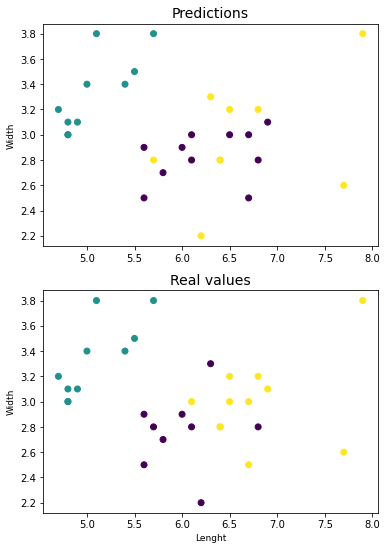

In [527]:
model.plot(y_test)
model.score(y_test, model.predictions)

## Класс kNN с другой функций расстояния

Давайт создадим второй класс kNN, который теперь использует другую функцию расстояния. Создавать второй класс с нуля не будем, а воспользуемся свойством классов - наследование. В новой классе поменяем только функцию расстояния, а все остальное оставим таким же. Для нахождения косинусной меры, используем функцию `cosine` из библиотеки `scipy`.

![](https://datascience-enthusiast.com/figures/cosine_sim.png)

In [528]:
from scipy.spatial import distance

class cosKNN(KNN):
    
    @staticmethod
    def _dist(a,b):
        """
        Через косинусную меру

        возвращаетs: число с плавающей точкой
        """
        return distance.cosine(a,b)

**Задание 18 - 0.5 балла**

Сравните качество новой модели с косинусным расстоянием при разных параметрах `k` в интервале от 1 до 15. Какая модель для этой задачи подходит лучше?

In [529]:
#Обычная модель

In [532]:
k_list = []
score_KNN = []
score_cosKNN = []

for k in range(1,16):
    k_list.append(k)
    
    KNN_model = KNN(k)
    KNN_model.fit(X_train, y_train)
    KNN_model.predict(X_test)
    score_KNN.append(KNN_model.score(y_test, KNN_model.predictions))
    
    cosKNN_model = cosKNN(k)
    cosKNN_model.fit(X_train, y_train)
    cosKNN_model.predict(X_test)
    score_cosKNN.append(cosKNN_model.score(y_test, cosKNN_model.predictions))

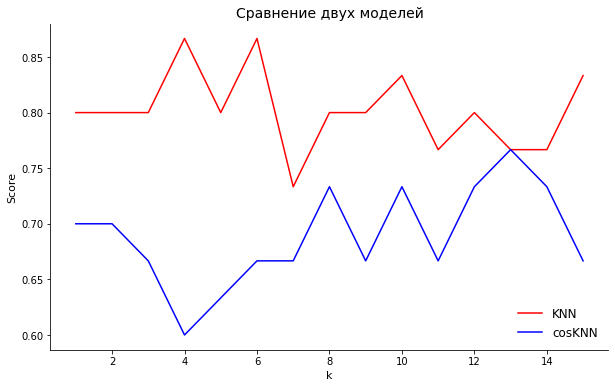

In [540]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.plot(k_list, score_KNN, label = 'KNN', color='red')
ax.plot(k_list, score_cosKNN, label = 'cosKNN', color='blue')
ax.set_title('Сравнение двух моделей', fontsize = 14)
ax.set_xlabel('k', fontsize = 11)
ax.set_ylabel('Score', fontsize = 11)   
ax.legend(loc=4, fontsize=12, frameon=False)

**Вывод:** Обычный алгоритм превосходит cosKNN в данной задаче, что связано с её относительной простотой. При этом лучше всего KNN работает при числе соседей k=4 и k=6, однако для cosKNN значение k=4 показывает наихудшую точность. Это связано с тем, что значения лепестков не могут принимать отрицательные значения, поэтому возможность учитывать направление вектора совсем не помогат улучшить точность предсказания. При этом CosKNN очень полезен в задачах векторного представления слов и используется в NLP, потому что позволяет лучше отражать взаимосвязь между словами со схожими смыслами, такие как "король-королева" и "мужчина-женщина". 

**Задание 19 - 0.5 балла**

Если вы дошли до этого места - наверное вы очень устали. Или нет, все может быть. В любом случае: вы - герой. Напишите здесь что вам понравилось/не понравилось в данной домашке, что еще вы бы хотели увидеть

*Мне все очень и очень понравилось, особенно блокнот про классы. До этого я не встречала настолько подробного и качественного объяснения этой темы. Также спасибо за маленькие штуки для самопроверки, хотелось бы, чтобы их было больше. Единственная проблема - не всегда понятно задание, например, 17-е: какой именно график лучше подойдет в данной ситуации? Очень помог бы не указанный тип, а более подробное описание того, что нужно сделать. Но в целом это восторг: в январе я не могла написать на Python даже простой цикл, а сейчас могу построить +- работающий алгоритм KNN. Когда я шла на эту программу, то не ожидала, что здесь учат программировать, причем настолько хорошо. Это был прекрасный предмет и очень хотелось бы, чтобы он шел минимум два модуля.*
(( _ _ ))..zzzZZ 